# Computer Vision - P3

## Delivery

Your overall grading will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented exhaustively and in **English**. 

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Answers to questions also need to be in **English**.

- Make sure to print and plot exactly what it is indicated. If a reference image is provided, your output is expected to be exactly the same unless instructed differently. 

- The deliverable of both parts must be a file named **P3_Student1_Student2.zip** that includes:
    - The notebook P3_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook (upload the ones that were not provided)
    
- It is required that your code can be run by us without need of any modification and without getting any errors.

- Use packages and solutions that were covered in your class and tutorials. If you are unsure about using a particular package, you should seek clarification from your instructor to confirm whether it is allowed.

- Please refrain from utilizing resources like ChatGPT to complete this lab assignment.

**Deadline (Campus Virtual): Group A & F: November 7th, 23:00 h; Group B: November 14th, 23:00 h** 

==============================================================================================
## Practicum 3: Image and Video Segmentation

==============================================================================================

The main topics of Laboratory 3 are:

3.1. Segmentation of video shots with static scenes.

3.2. Background subtraction.

3.3. Segmentation of images.

The following chapters of the book “Computer Vision: Algorithms and Applicatons” from Richard Szeliski have further information about the topic:

* Chapter 4: Computer Vision: Algorithms and Applications.

* Chapter 5: Segmentation.



In [2]:
# Example
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## 3.1 Segmentation of images

Apply the image segmentation methods (Felzenswhalbs, Slic and Quickshift) based on the clustering of points corresponding to the pixels but in the feature space RGB-XY space.

**Hint**: 
- Different image segmentation commands can be found in skimage.segmentation.
- Use the function segmentation.mark_boundaries for seeing the boundaries of the segments.
- Use the inline pluggin to visualize images (%matplotlib inline).

<img src="images_notebook/image_Segmentation.png" width=600>

### Felzenszwalb's efficient graph based segmentation

a) Read 'barcelona.jpeg' image from the folder 'images' and segment it using the Felzenszwalbs's method. Comment the result.

In [3]:
# imports we will need in the notebook:
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import img_as_float
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift
from skimage.segmentation import mark_boundaries

(667, 1000)
Felzenszwalb number of segments: 2954


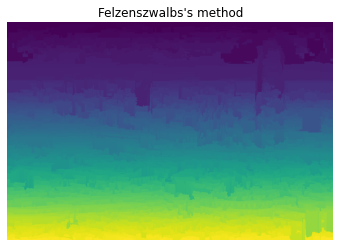

(-0.5, 999.5, 666.5, -0.5)

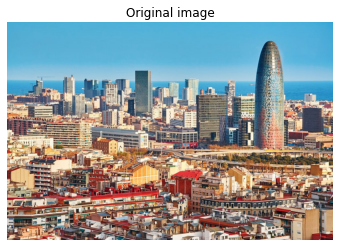

In [4]:
# Read the image
image_path = "./images_notebook/barcelona.jpeg"
bcn_image = io.imread(image_path)

# we use the same values as we saw at the tutorial
segments_fz = felzenszwalb(bcn_image, scale=100, sigma=0.5, min_size=50)

# And now we show the result!
print(segments_fz.shape)
print(f"Felzenszwalb number of segments: {len(np.unique(segments_fz))}")

plt.imshow(segments_fz) 
plt.title("Felzenszwalbs's method")
plt.axis('off')
plt.show()

plt.title("Original image")
plt.imshow(bcn_image)
plt.axis('off')

b) Create a function where you explore at least 3 different parameter combinations in order to obtain a better image segmentation. Your function should receive the image and the set of parameters you would like to change. It should also resize your image to be a third part of the original image size. Your function results should be a visualization of the results and a print of the number of segments.  


Answer the following questions:
- Is it critical to convert the image in grayscale in order to do the image segmentation?
- Is it critical to convert the image in float in order to do the image segmentation?
- Which are the optimal values according to your subjective perception?
- How does each parameter behave?
- Does the image reduction affect the optimal values? 

**ANSWER**

**- Is it critical to convert the image in grayscale in order to do the image segmentation?**

That's not true! We don't need no convert to grayscale in order to operate with Felzenszwalb's algorithm, because it can be used directly into colored imatges, we need to remember that this algorithm consideres every pixel intesity values in channel separately!

**- Is it critical to convert the image in float in order to do the image segmentation?**
Is not necessary, because the method accept images inputs of any data!

**- Which are the optimal values according to your subjective perception?**

scale=100, sigma=0.5, min_size=50
As we saw in the tutorial (these are the "normal / optimal" values, but we can use differents ones to experiments with the result.

**- How does each parameter behave?**

    * Scale: Higher scale means larger segments, potetially merging. Lower scale, less segmentation, but splitted into differents parts.
    * Sigma: Higher Sigma produces smoother segments (small and noisy regions are merged!). Lower sigma, preserve fine details but may result into noisier results.
    * min_size: sets the minimum segments size. Smaller values, creates more fine details or noise, higher values may result into larger and more cohesive regions.

**-Does the image reduction affect the optimal values?**

Yeah it can affect the optimal values, if we reduce the size a lot, maybe we need to decrease the "scale" value too.

In [5]:
from skimage import io
from skimage.segmentation import felzenszwalb
from skimage.transform import resize

# we already read the image, so keep in mind that we are working with bcn_image variable name
def custom_exploring(my_image, my_parameters_to_explore):
    # we need to resize the image to the third part of the original image size (as exercices ask!)
    # first we need to calculate the new height and width
    new_height = bcn_image.shape[0] // 3
    new_width = bcn_image.shape[1] // 3
    
    # we'll use resize() as we saw on the practica 2!
    # The 'anti_aliasing=True' parameter smoothes the image during resizing for better quality.
    resized_image = resize(bcn_image, (new_height, new_width), anti_aliasing = True)
    counter = 1
    # now we''l iterate into our parameters
    for params in my_parameters_to_explore:
        scale, sigma, min_size = params
        
        # we do the image segmentation here, using the current parameter combination
        segments_fz = felzenszwalb(resized_image, scale=scale, sigma=sigma, min_size=min_size)
        
        print("Image: " + str(counter))
        # Print the number of segments
        num_segments = len(np.unique(segments_fz))
        print(f"Number of segments: {num_segments}")
        
        # Display the segmented image
        plt.imshow(segments_fz)
        plt.title(f"Segmentation (scale={scale}, sigma={sigma}, min_size={min_size})")
        plt.axis('off')
        plt.show()
        
        counter += 1
        
    

Image: 1
Number of segments: 351


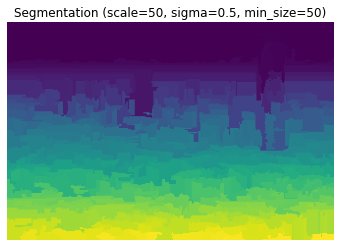

Image: 2
Number of segments: 151


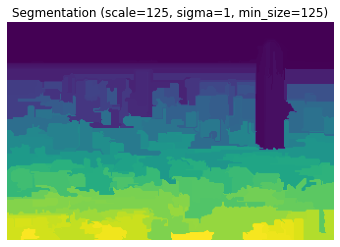

Image: 3
Number of segments: 64


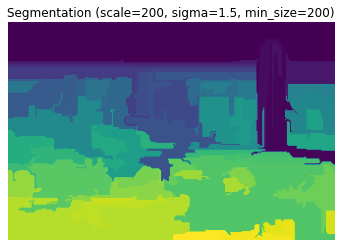

In [6]:
# scale, sigma, min_size
my_parameters_to_explore = [ (50, 0.5, 50), (125, 1, 125),(200, 1.5, 200) ]
custom_exploring(bcn_image, my_parameters_to_explore)

c) Comment the definition of the algorithm (use approximately 3 lines at most), its advantages and disadvantages.

**ANSWER**

Is a superpixel segmentation method that makes groups of pixels to create diferents regions.
It takes a graph-based approach to segmentation,it constructs an undirected graph with the image pixels as vertices and the weight of an edge between the two vertices being some measure of the dissimilarity.

**ADVANTATGES:**
 - It can be used in both grayscale and colored images.
 - Is a fast and scalable algorithm.
 - Don't need complex pre-processed data, so it is easy to use and implement.
 
**DISADVANTATGES:**
 - May not admit images that contains significant texture variations.
 - The number of segments can vary depending on the input of the image.


### SLIC - K-Means based image segmentation
d) Segment the same image using the SLIC image segmentation algorithm using the parameters by default. 

SLIC number of segments: 40


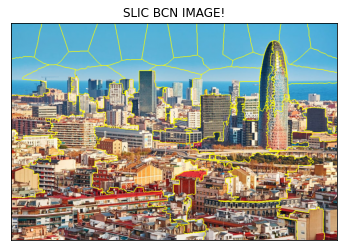

In [7]:
# we will use slic method as we saw in the tutorial
# so let's used with bcn_image
segments_slic = slic(bcn_image, n_segments=100, compactness=10, sigma=1, start_label=1)
print(f"SLIC number of segments: {len(np.unique(segments_slic))}")

plt.imshow(mark_boundaries(bcn_image, segments_slic))
plt.title("SLIC BCN IMAGE!")
plt.xticks([])
plt.yticks([])
plt.show()


Create a function where you explore at least 3 different parameter combinations in order to obtain a better image segmentation. Your function should receive the image and the set of parameters you would like to change. It should also resize your image to be a third part of the original image size. Your function results should be a visualization of the results and a print of the number of segments.  


In [8]:
# We already did that on b), so let's re-use the code and modify it a little bit

# we already read the image, so keep in mind that we are working with bcn_image variable name
def custom_exploring_v2(my_image, my_parameters_to_explore):
    # we need to resize the image to the third part of the original image size (as exercices ask!)
    # first we need to calculate the new height and width
    new_height = bcn_image.shape[0] // 3
    new_width = bcn_image.shape[1] // 3
    
    # we'll use resize() as we saw on the practica 2!
    # The 'anti_aliasing=True' parameter smoothes the image during resizing for better quality.
    resized_image = resize(my_image, (new_height, new_width), anti_aliasing = True)
    counter = 1
    # now we''l iterate into our parameters
    for params in my_parameters_to_explore:
        n_segments, compactness, sigma, start_label = params
        
        # Perform SLIC segmentation 
        segments_slic = slic(resized_image, n_segments = n_segments, compactness = compactness, 
                             sigma= sigma, start_label=start_label)
        
        print("Image: " + str(counter))
        # Print the number of segments
        num_segments = len(np.unique(segments_slic))
        print(f"SLIC number of segments: {num_segments}")
        
        # Display the segmented image
        plt.imshow(mark_boundaries(resized_image, segments_slic))
        plt.title(f"Slic Image (n_segments={n_segments}, compactness={compactness}, sigma={sigma}, start_label={start_label})")
        plt.axis('off')
        plt.show()
        
        counter += 1
        
    

Image: 1
SLIC number of segments: 58


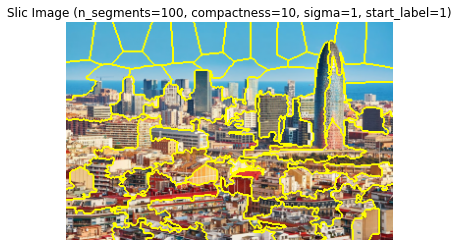

Image: 2
SLIC number of segments: 440


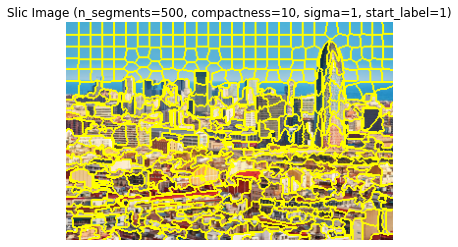

Image: 3
SLIC number of segments: 84


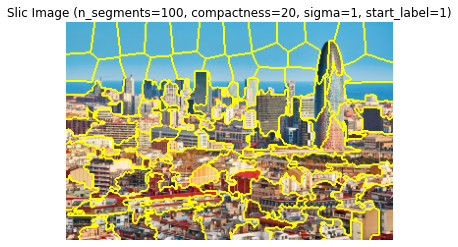

Image: 4
SLIC number of segments: 90


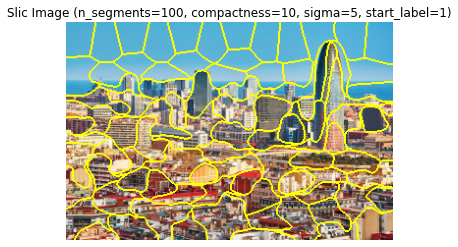

In [9]:
my_parameters_to_explore = [(100, 10, 1, 1), (500, 10, 1, 1), (100, 20, 1, 1), (100, 10, 5, 1)]
custom_exploring_v2(bcn_image, my_parameters_to_explore)

f) Comment what the algorithm is (in up to 3 lines).

**ANSWER**
Divides an image into visually coherent and no-overlapping regions (superpixels).
It groups similar-colored pixels that are close together, like puzzles!. This helps in simplifying image analysis and understanding, making it easier to work with images.

### Quickshift image segmentation

g) Segment the original image using the Quickshift algorithm. 

Create a loop where you explore kernel_size variations in order to obtain a better image segmentation. Argument why a higher or lower value improves the segmentation results. 


Quickshift number of segments: 3561


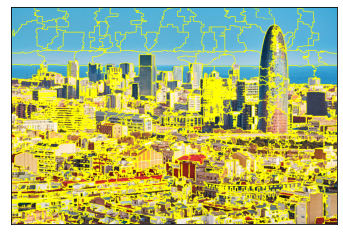

In [10]:
# we apply the quickshift technique -> all the parameters are the ones we saw in the tutorial!
segments_quick = quickshift(bcn_image, kernel_size=10, ratio=1, max_dist=10)

# now we show the image
print(f"Quickshift number of segments: {len(np.unique(segments_quick))}")

plt.imshow(mark_boundaries(bcn_image, segments_quick))
plt.xticks([])
plt.yticks([])
plt.show()

In [14]:
# PLEASE NOTE THAT THIS FUNCTION REQUIRES A LOT OF CPU! SO MAYBE IT TAKES A LITTLE BIT TO COMPILE IT!
def custom_exploring_v3(my_image, customKernel):
    counter = 1
    for kernelN in customKernel:
        # we applt the quickshift algorithm, all the params will be by default except kernelSeize
        segments_quick = quickshift(bcn_image, kernel_size=kernelN, ratio=1, max_dist=10)
        
        print(f"Quickshift number of segments: {len(np.unique(segments_quick))}")
        
        #let's show our results!
        plt.imshow(mark_boundaries(my_image, segments_quick))
        plt.title(f"QuickShift Image: {counter}, (kernel_size={kernelN}")
        plt.xticks([])
        plt.yticks([])
        plt.show()
        counter += 1

Quickshift number of segments: 5050


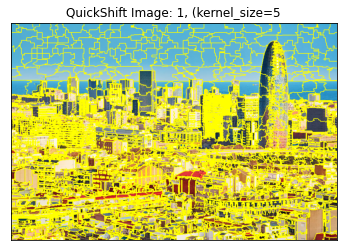

Quickshift number of segments: 3561


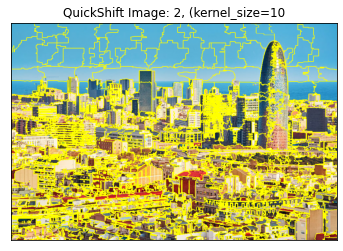

Quickshift number of segments: 4182


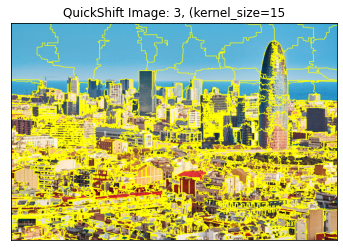

In [15]:
# test our function
customKernel = [5,10,15]
custom_exploring_v3(bcn_image, customKernel)

**ANSWER**

The choice of kernel size in the Quickshift algorithm impacts the quality of image segmentation. A higher kernel size improves segmentation results by providing better connectivity between pixels, especially for images with significant color variation. It also has a smoothing effect, removing noise!.

On the other hand, a lower kernel size captures finer details and smaller objects, resulting in increased accuracy and detail. We can not know which is the optimal kernel value because it depends about the image it self! 

So we think it's a good idea to experiment with different kernel sizes to determine the best value for segmentation.

h) Comment what the algorithm is (in up to 3 lines).

**ANSWER**

This method divides an image into different segments based on similarities between pixels. It does this by looking for areas where the color or texture of adjacent pixels is similar, grouping pixels with similar characteristics, it creates segments that represent different objects or regions in the image. 

### Comparison of segmentation algorithms

Apply the best set of parameters of each algorithm and apply it to: 
1) Original image
1) Salt and pepper noise version of this image
2) Flipped image (horizontally)
3) Canny edge detector result of this image. 

Plot the image and its results of fezenswalb and SLIC algorithm in a 1x3 subplots. 

In [80]:
# resource used -> https://www.youtube.com/watch?v=6SNBUWTX3MA
# then I developed my custom function to apply the salt and pepper effect
def sp_effect_customized(my_image):
    # Salt and pepper amount (determined for the custom noise we want to apply)
    pepper = 0.15
    salt = 1 - pepper

    # Copy the original image
    sp_image = np.copy(my_image)

    # Apply salt and pepper effect
    x, y, _ = sp_image.shape
    for i in range(x):
        for j in range(y):
            rdn = np.random.random()
            if rdn < pepper:
                sp_image[i, j, :] = 0  # Set pixel to black (0) for pepper effect
            elif rdn > salt:
                sp_image[i, j, :] = 255  # Set pixel to white (255) for salt effect

    return sp_image


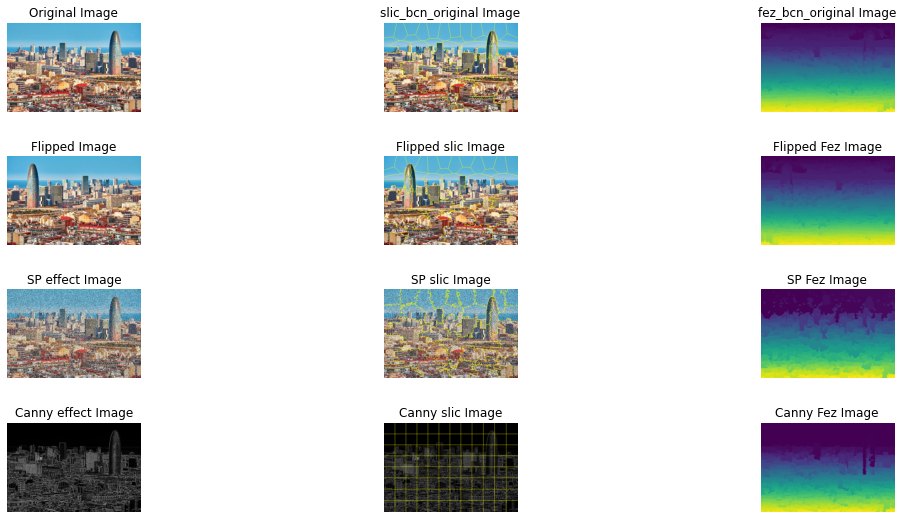

In [88]:
from skimage.util import img_as_ubyte
from skimage.filters import sobel
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries

# Load original Image
image_path = "./images_notebook/barcelona.jpeg"
bcn_image_original = io.imread(image_path)

# Apply SLIC and Fezenszwalb superpixel segmentation
# we'll use the ordinary values, as we saw in the tutorial
# n_segments=100, compactness=10, sigma=1, start_label=1
slic_bcn_original = slic(bcn_image_original, n_segments=100, compactness=10, sigma=1, start_label=1)
fez_bcn_original = felzenszwalb(bcn_image_original, scale=100, sigma=0.5, min_size=50)

# Flipped the image horizontally
flipped_image_result = np.fliplr(bcn_image_original)
# we'll use the same values as the original, seems there are not several changes
slic_flipped = slic(flipped_image_result, n_segments=100, compactness=10, sigma=1, start_label=1)
fez_flipped = felzenszwalb(flipped_image_result, scale=100, sigma=0.5, min_size=50)

# Salt and pepper effect image
sp_image_result = sp_effect_customized(bcn_image_original)
# we'll reduce n_segments, since it has additional noise 
slic_sp = slic(sp_image_result, n_segments=50, compactness=15, sigma=1, start_label=1)
fez_sp = felzenszwalb(sp_image_result, scale=80, sigma=0.5, min_size=40)

# Canny edge detector -> converted to gray image
canny_edge_image_result = sobel(rgb2gray(bcn_image_original))
# in canny effect n_segments is not relevant, but we need to decrease compactness
slic_canny = slic(canny_edge_image_result, n_segments=100, compactness=5, sigma=1, start_label=1)
fez_sp = felzenszwalb(sp_image_result, scale=200, sigma=1, min_size=100)


# Set up the subplot layout
plt.figure(figsize=(18, 9))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Plot original image
plt.subplot(4,3,1)
plt.imshow(bcn_image_original)
plt.title('Original Image')
plt.axis('off')

plt.subplot(4,3,2)
plt.imshow(mark_boundaries(bcn_image_original, slic_bcn_original))
plt.title('slic_bcn_original Image')
plt.axis('off')

plt.subplot(4,3,3)
plt.imshow(fez_bcn_original)
plt.title('fez_bcn_original Image')
plt.axis('off')

# Plot Flipped image
plt.subplot(4,3,4)
plt.imshow(flipped_image_result)
plt.title('Flipped Image')
plt.axis('off')

plt.subplot(4,3,5)
plt.imshow(mark_boundaries(flipped_image_result, slic_flipped))
plt.title('Flipped slic Image')
plt.axis('off')

plt.subplot(4,3,6)
plt.imshow(fez_flipped)
plt.title('Flipped Fez Image')
plt.axis('off')

# Plot Salt and pepper effect image
plt.subplot(4,3,7)
plt.imshow(sp_image_result)
plt.title('SP effect Image')
plt.axis('off')

plt.subplot(4,3,8)
plt.imshow(mark_boundaries(sp_image_result, slic_sp))
plt.title('SP slic Image')
plt.axis('off')

plt.subplot(4,3,9)
plt.imshow(fez_sp)
plt.title('SP Fez Image')
plt.axis('off')

# Plot Canny effect image
plt.subplot(4,3,10)
plt.imshow(canny_edge_image_result, cmap = 'gray')
plt.title('Canny effect Image')
plt.axis('off')

plt.subplot(4,3,11)
plt.imshow(mark_boundaries(canny_edge_image_result, slic_canny), cmap = 'gray')
plt.title('Canny slic Image')
plt.axis('off')

plt.subplot(4,3,12)
plt.imshow(fez_canny)
plt.title('Canny Fez Image')
plt.axis('off')


plt.show()


- Do the transformations affect the segmentation? Why or why not? 
- Can the number of segments can be used as a criterion for the performance of the algorithms?

**ANSWER**

**Do the transformations affect the segmentation? Why or why not?**

Yes, they can introduce variations in image characteristics and impact the image segmentation result.
For example, if we use salt and pepper image effect, can disrupt the image's emoothness, affecting the accuracy of the segmentation.

**Can the number of segments can be used as a criterion for the performance of the algorithms?**

The number of segments can provide an indication of the level of detail in the segmentation. However, it does not necessarily reflect the overall performance of the algorithm.

## 3.2 Segmentation via clustering

In this exercise, you will implement hierarchical clustering to segment the "images_notebook/loro.png" image in gray scales. First load and visualize the image, then implement hierarchical clustering over the pixels and plot the final results side by side to the original image

Hint: Sklearn has a hierarchical clustering implementation you should use. Reshape your dataset such that you have a 2 dimensional array. Use linkage "ward" and grid_to_graph function for the connectivity parameter. 

<img src="images_notebook/loro_segmentation.jpg" width=600>

Compute structured hierarchical clustering...
Number of clusters: 27


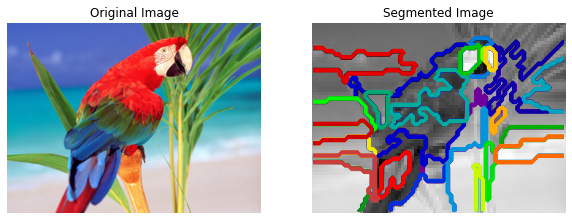

In [89]:
# Resource Used :
# https://scikit-learn.org/stable/auto_examples/cluster/plot_coin_ward_segmentation.html#sphx-glr-auto-examples-cluster-plot-coin-ward-segmentation-py
import numpy as np
from scipy.ndimage import gaussian_filter
from skimage import io, color
from skimage.transform import rescale
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load and visualize the image
image_path = "images_notebook/loro.png"
loro_image = io.imread(image_path)
loro_image_gray = color.rgb2gray(loro_image)

# Resize and smoothen the image using gaussian filter
smoothened_loro = gaussian_filter(loro_image_gray, sigma=2)
rescaled_loro = rescale(smoothened_loro, 0.2, mode="reflect", anti_aliasing=False)

# Reshape the data
X = np.reshape(rescaled_loro, (-1, 1))

# Define structure of the data (connectivity) -> as they said at the statement (grid_to_graph) :D
connectivity = grid_to_graph(*rescaled_loro.shape)

# Compute clustering
print("Compute structured hierarchical clustering...")
n_clusters = 27  # number of regions
ward = AgglomerativeClustering(
    n_clusters=n_clusters, linkage="ward", connectivity=connectivity
)
ward.fit(X)
label = np.reshape(ward.labels_, rescaled_loro.shape)
print(f"Number of clusters: {np.unique(label).size}")

# Plot the results side by side with the original image
plt.figure(figsize=(10, 5))

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(loro_image)
plt.title('Original Image')
plt.axis("off")

# Plot the segmented regions
plt.subplot(1, 2, 2)
plt.imshow(rescaled_loro, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(
        label == l,
        colors=[
            plt.cm.nipy_spectral(l / float(n_clusters)),
        ],
    )
plt.title('Segmented Image')
plt.axis("off")

plt.show()


## Video segmentation

Given the video stored in ‘Barcelona-sequence’, which contains images acquired by a static camera, we ask you to:
- Find the temporal segments of the video (shots). Where the scene change? (Section 3.1)
- Extract the background images and thus, remove all the "artifacts" considered as foreground related to movement. (Section 3.2)




<img src="images_notebook/screenshot.png" width=600>

## 3.3 Segmentation of video shots

Read and visualize the sequence of images "images_notebook/Barcelona-sequence".

**Hint:** In order to read a collection of images, we wil use the function [animation.FuncAnimation](https://matplotlib.org/2.0.0/api/_as_gen/matplotlib.animation.FuncAnimation.html). Observe in the following Example, how FuncAnimation is used to read and visualize a sequence of frames. Explore the parameters of animation.FuncAnimation().

In [ ]:
# Your solution here

a) Find where a shot (scene) finishes and the following starts (the shot boundaries). To achieve this goal, we are going to compute the difference between the histograms of consecutive frames. The proposed solution required:

- Compute the histogram for each RGB channel

- The 'total' histogram of the image is computed as the sum of the three histograms

- Compute the mean of the difference (in absolute value) between the histograms of two consecutive frames

Those differences with largest values corresponds to the transitions between shots. 

Therefore, **we need to create a funtion which return an array with the differences between histograms. We will plot the resulting array in order to localice the maximum values as well as a suitable threshold to define localize the transitions.**

<img src="images_notebook/histogramshot.png" width=600>
<img src="images_notebook/difference_histograms.png">

To solve this exercise, you need to create a **temporal plot** showing a frame by frame difference measure to be defined by you, being applicable to distinguish the shots. Define a criterion to detect the boundaries of the shots and visualize it in a static plot.

The plot above was obtain by using 64 bins histogram and the measure as mean of absolute difference. 

In [ ]:
# Your solution here

b) Additionally, create an interactive plot executing the following code in "Example A". Substitute the bottom plot with the temporal plot showing the differences between the consecutive frames. 

In [ ]:
# Example A
def data_gen():
    return enumerate(mean_differences)


In [ ]:
# Your solution here

c) Show the initial and final images of each shot extracted as follows:

<img src="images_notebook/result_shot_detection.png">


Use the previous plot to define the proper threshold value over the differences of histograms. Use the threshold to localize indexes of the array returned by the function proposed in the previous question and, therefore, localize the initial and final frames for each shot as shown in the reference image


In [ ]:
# Your solution here

d) Which measure have you used in order to visually distinguish the shots in a plot? Explain your solution.

In [ ]:
# Your solution here


e) Would your video segmentation strategy be able to separate and track objects? Argue your answer.

In [ ]:
# Your solution here


f) Would your video segmentation strategy be able to capture continuous transition? Argue your answer.

In [ ]:
# Your solution here


## 3.4 Background subtraction

Apply the background subtraction algorithm (check theory material).

<img src="images_notebook/screenshot2.png" width=500>

a) Visualize the following images for each different scene of the video:

    1) an image belonging to the shot
    2) the background image, and
    3) the foreground.
    
**Hint**: You can construct a mask obtained from the original image and the background in order to know which parts of the image form part from the foreground and recover from the original image just the foreground regions.

In [ ]:
# Your solution here

b) What do the static background images represent? 

In [ ]:
# Your solution here

c) What happens if the shots are not correctly extracted? And, what happens if you find too many shots in the video? 

In [ ]:
# Your solution here

d) What happens if you subtract the background image from the original one?

In [ ]:
# Your solution here

e) In which situations does the algorithm work and in which it does not? Do you see any additional application for this algorithm?

In [ ]:
# Your solution here

f) Visualize the highest and lowest similarity frame with respect to the foreground images of each scene. You can use the metric of your like, explain why you picked it. 

In [ ]:
# Your solution here
